# Maching Learning - Neural Network

CS440/640


<br>      This code is about how to implement neural network                                                                     



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.
from sklearn.model_selection import KFold # import KFold
import math

## Neural Network Algorithm


In [16]:
class NeuralNetwork:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            hidden_dim: Number of dimensions of the hidden layer
            output_dim: Number of classes
        """

        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)  
        self.bias1 = np.zeros((1, hidden_dim))

        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)  
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        
        num_examples = np.shape(X)[0]
        
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = hypertan(z1)
        z2 = np.dot(a1, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores2 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores2[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        
#         print(1./num_examples * data_loss)
            
        return 1./num_examples * data_loss   

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        
        z1 = np.dot(X,self.theta1) + self.bias1
        softmax_scores1 = hypertan(z1)
        
        z2 = np.dot(softmax_scores1,self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores2 = exp_z2 / (exp_z2 + 1)
        
        predictions = np.argmax(softmax_scores2, axis = 1)
        
        return predictions
        
    #--------------------------------------------------------------------------
    # implement neural network using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01, R = 0.5):
    
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):

            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            softmax_scores1 = hypertan(z1)
            z2 = np.dot(softmax_scores1, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            # softmax_scores2 = exp_z2 / (exp_z2 + 1)
            softmax_scores2 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)

            # Backpropagation
            beta2 = np.zeros_like(softmax_scores2)
            #print (beta)
            one_hot_y2 = np.zeros_like(softmax_scores2)
            for i in range(softmax_scores1.shape[0]):
                one_hot_y2[i,y[i]] = 1
            beta2 = softmax_scores2 - one_hot_y2
            
            beta1 = np.multiply(np.dot(beta2,self.theta2.T), hypertanDerivative(softmax_scores1))

        
            # Compute gradients of model parameters
            dtheta1 = np.dot(X.T,beta1) + R*self.theta1
            dbias1 = np.sum(beta1, axis=0) 
            
            dtheta2 = np.dot(softmax_scores1.T,beta2)+ R*self.theta2
            dbias2 = np.sum(beta2, axis=0)
    
            # Gradient descent parameter update
            self.theta1 -= alpha * dtheta1
            self.bias1 -= alpha * dbias1   
            
            self.theta2 -= alpha * dtheta2
            self.bias2 -= alpha * dbias2
        return 0

In [17]:
def sigmoid(z):
    """sigmoid
    """
    return 1 / (1 + np.exp(-z))

def sigmoidDerivative(a):
    """sigmoid求导
    """
    return np.multiply(a, (1-a))

def hypertan(z):
    """hypertan
    """
    return np.tanh(z)

def hypertanDerivative(a):
    """hypertan求导
    """
    return np.ones(np.shape(a)) - a**2 

In [18]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [19]:
def confusion_matrix(X,Y):
    acc = 0
    y_pred = nn.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], Y[i]] += 1
        if Y[i] == y_pred[i]:
                acc += 1
    acc = acc/len(y_pred)
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)

## Getting Started --- nonlinear data

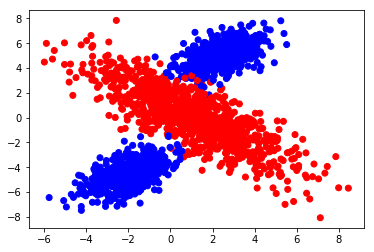

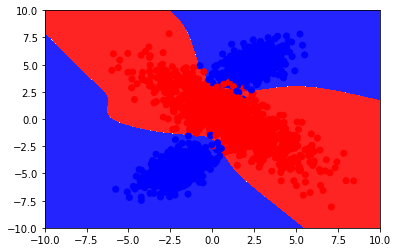

ACCURACY:  0.9905
CONFUSION MATRIX: 
 [[990.   9.]
 [ 10. 991.]]


In [20]:
#1. Load and Initilaize data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=5, random_state=None, shuffle=False)


#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

#3. Initialize model
input_dim = np.shape(X[:1600,:])[1]
output_dim = np.max(y[:1600,]) + 1
nn = NeuralNetwork(input_dim, output_dim,30)


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Plot decision boundary
#     print("Decision Boundary before train: ")
#     plot_decision_boundary(nn, X_train, y_train)
    nn.fit(X_train,y_train,1000,alpha=0.001, R = 0.5)
    # Plot decision boundary after trainning
#     print("Decision Boundary after train: ")
#     plot_decision_boundary(nn, X_test, y_test)
#     confusion_matrix(X_test,y_test)
nn.compute_cost(X, y)
plot_decision_boundary(nn, X, y)

confusion_matrix(X,y)


## Getting Started --- nonlinear data

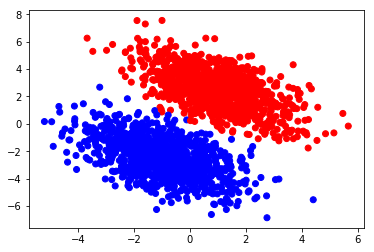

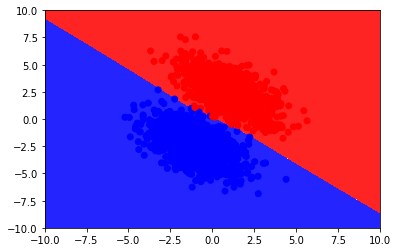

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[1000.    0.]
 [   0. 1000.]]


In [21]:
#1. Load and Initilaize data
X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_linearY.csv', delimiter=',').astype(np.int64)
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=5, random_state=None, shuffle=False)


#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

#3. Initialize model
input_dim = np.shape(X[:1600,:])[1]
output_dim = np.max(y[:1600,]) + 1
nn = NeuralNetwork(input_dim, output_dim,30)


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Plot decision boundary
#     print("Decision Boundary before train: ")
#     plot_decision_boundary(nn, X_train, y_train)
    nn.fit(X_train,y_train,1000,alpha=0.001, R = 0.005)
    # Plot decision boundary after trainning
#     print("Decision Boundary after train: ")
#     plot_decision_boundary(nn, X_test, y_test)
#     confusion_matrix(X_test,y_test)
plot_decision_boundary(nn, X, y)
confusion_matrix(X,y)


## Digit Recognition

In [8]:
train_digitX = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
train_digity = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
input_dim = np.shape(train_digitX)[1]
output_dim = np.max(train_digity) + 1
nn = NeuralNetwork(input_dim, output_dim,20)
nn.fit(train_digitX,train_digity,1000,alpha=0.001, R = 0.005)
confusion_matrix(train_digitX,train_digity)

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[90.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 91.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 91.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 92.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 89.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 91.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 90.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 90.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 86.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 88.]]


In [9]:
test_digitX = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
test_digity = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)
confusion_matrix(test_digitX,test_digity)

ACCURACY:  0.9388209121245829
CONFUSION MATRIX: 
 [[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 82.  0.  0.  1.  0.  1.  0.  3.  0.]
 [ 0.  0. 84.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2. 81.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0. 83.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  5.  0. 87.  0.  0.  3.  2.]
 [ 2.  1.  0.  0.  5.  1. 90.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 86.  0.  2.]
 [ 0.  1.  0.  5.  0.  0.  0.  0. 79.  1.]
 [ 0.  5.  0.  0.  3.  3.  0.  3.  1. 87.]]
